In [3]:
import os
import glob
import random
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm


from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

In [4]:
pip install tensorflow_addons

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # set the logging level to ERROR

tf.random.set_seed(3)
from tensorflow.python.keras import backend as K
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [7]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'


In [8]:
pip install importlib_metadata

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
train_csv = pd.read_csv("./Training_set.csv")
test_csv = pd.read_csv("./Testing_set.csv")

In [10]:
train_csv.head()


filename         label
0  Image_1.jpg       sitting
1  Image_2.jpg  using_laptop
2  Image_3.jpg       hugging
3  Image_4.jpg      sleeping
4  Image_5.jpg  using_laptop

In [11]:
train_fol = glob.glob("./train2/*") 
test_fol = glob.glob("./test/*")

In [12]:
train_csv


filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [13]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [14]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:

pip install ipykernel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


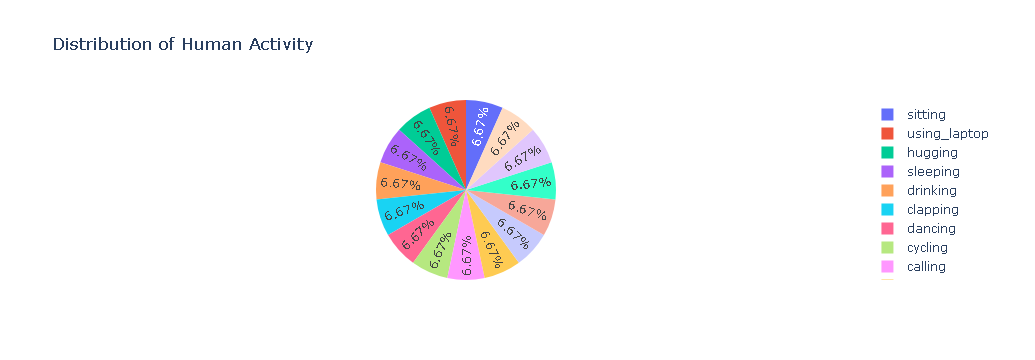

In [17]:
import plotly.express as px
l = train_csv.label.value_counts()
fig = px.pie(train_csv, values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()
plt.show()

In [18]:
filename = train_csv['filename']

situation = train_csv['label']

In [19]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [20]:
situation[105]

'drinking'

In [21]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import cv2
from matplotlib import pyplot as plt
def disp():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    print(imgg)
    train = "./"
    if os.path.exists(train+imgg):
        testImage = cv2.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

Image_6242.jpg


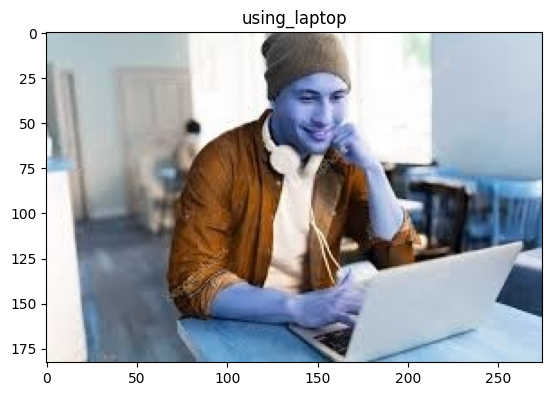

In [30]:
disp()

In [25]:
cd train2

/home/u188267/hackathon/train2


In [31]:
cd ..

/home/u188267/hackathon


In [33]:
from PIL import Image
img_data = []
img_label = []
length = len(train_fol)
temp=Image.open
for i in (range(len(train_fol)-1)):
    t = './train2/' + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [34]:
inp_shape = (160, 160,3)

In [35]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [36]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))

2023-03-17 01:09:15.648952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 01:09:15.649728: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [38]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [39]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
history = vgg_model.fit(iii,y_train, epochs=12)

Epoch 1/12
394/394 [==============================] - 253s 639ms/step - loss: 2.1592 - accuracy: 0.4480
Epoch 2/12
394/394 [==============================] - 252s 640ms/step - loss: 1.2191 - accuracy: 0.6013
Epoch 3/12
394/394 [==============================] - 250s 634ms/step - loss: 0.9410 - accuracy: 0.6902
Epoch 4/12
394/394 [==============================] - 251s 636ms/step - loss: 0.7407 - accuracy: 0.7562
Epoch 5/12
394/394 [==============================] - 249s 631ms/step - loss: 0.5621 - accuracy: 0.8150
Epoch 6/12
394/394 [==============================] - 252s 638ms/step - loss: 0.4096 - accuracy: 0.8648
Epoch 7/12
394/394 [==============================] - 250s 635ms/step - loss: 0.3004 - accuracy: 0.9030
Epoch 8/12
394/394 [==============================] - 250s 634ms/step - loss: 0.2127 - accuracy: 0.9306
Epoch 9/12
394/394 [==============================] - 250s 634ms/step - loss: 0.1808 - accuracy: 0.9413
Epoch 10/12
394/394 [==============================] - 251s 638m

In [41]:
vgg_model.save_weights("model.h5")

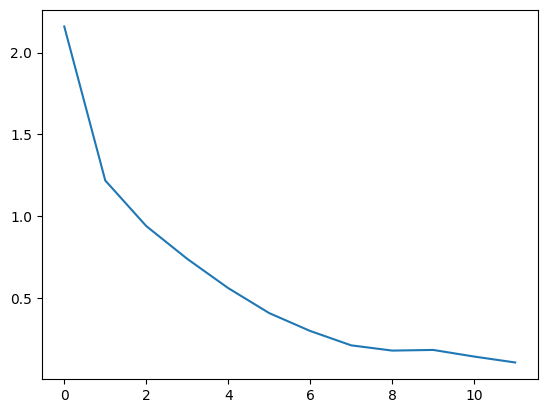

In [42]:
losss = history.history['loss']
plt.plot(losss)

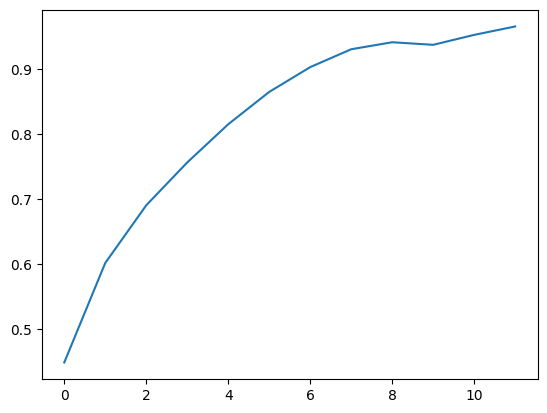

In [43]:
accu = history.history['accuracy']
plt.plot(accu)

In [44]:
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [45]:
thisdict = {
  0: "Drinking",
  11: "Fighting",
  4: "Using Mobile",
  13:"Walking",
   1:"Using Laptop",
    6:"Dancing"
}

In [46]:
def test_predict(test_image):
    result = vgg_model.predict(np.asarray([read_image(test_image)]))
    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)
    if(prediction in [0,11,4,13,1,6]):
        action=thisdict[prediction]
    
    else:
        action=""
    
    print("Action: ",action)
    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

In [47]:
cd ..

/home/u188267


In [48]:
cd hackathon

/home/u188267/hackathon


In [51]:
cd ..

/home/u188267/hackathon


1/1 [==============================] - 0s 426ms/step
probability: 99.96391534805298%
Predicted class :  6
Action:  Dancing


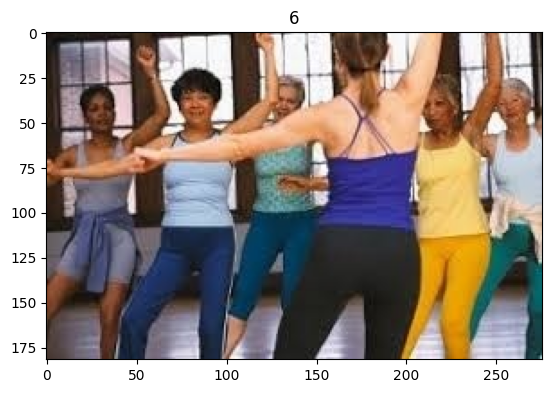

In [50]:
test_predict('./Image_108.jpg')

1/1 [==============================] - 0s 59ms/step
probability: 69.3254828453064%
Predicted class :  10
Action:  


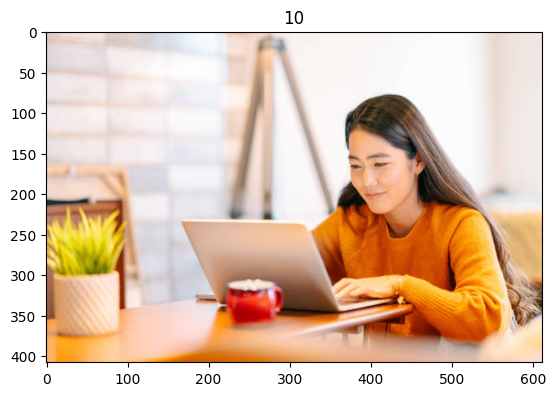

In [52]:
test_predict('./l1.jpg')

1/1 [==============================] - 0s 51ms/step
probability: 98.3380675315857%
Predicted class :  14
Action:  


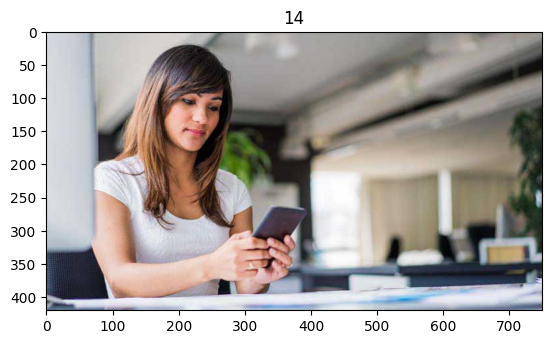

In [57]:
test_predict('./m3.jpg')

1/1 [==============================] - 0s 50ms/step
probability: 99.99998807907104%
Predicted class :  13
Action:  Walking


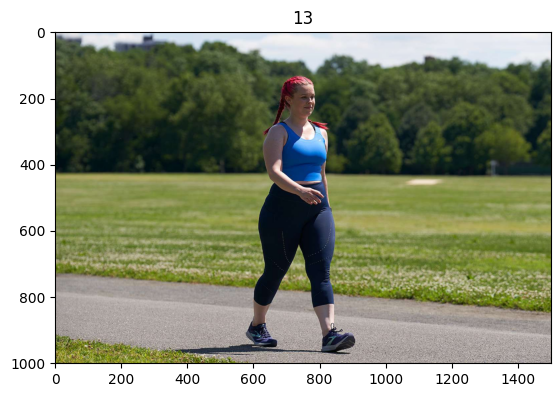

In [54]:
test_predict('./w1.jpg')

1/1 [==============================] - 0s 48ms/step
probability: 99.90909099578857%
Predicted class :  1
Action:  Using Laptop


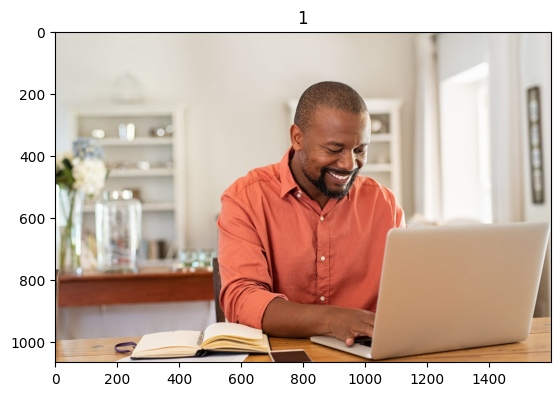

In [56]:
test_predict('./l.jpg')